<a href="https://colab.research.google.com/github/KunalAyush1/CS229_learning/blob/main/PCAfromscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
np.random.seed(42)
mean = [ 0 , 0 , 0]
cov = [[1 , 0.9 , 0.7],
       [0.9 , 1 , 0.6],
       [0.7, 0.6, 1]]

X = np.random.multivariate_normal(mean , cov, size = 100)

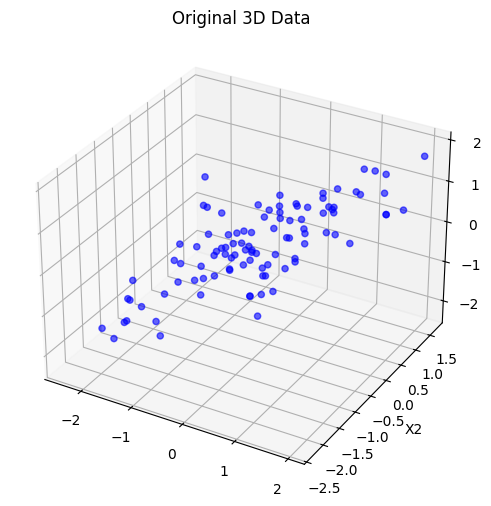

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c='blue', alpha= 0.6)
ax.set_title("Original 3D Data")
ax.set_label("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
plt.tight_layout
plt.show()

In [13]:
def PCA(X , k):
  def standardize(X):
    mean = np.mean(X , axis = 0)
    std = np.std(X , axis = 0)
    X_std = ( X - mean) / std
    return X_std, mean , std


  def compute_covariance_matrix(X):
    return np.dot(X.T , X) / (X.shape[0] - 1)

  def compute_eigens(cov_matrix):
    return np.linalg.eigh(cov_matrix)

  def sort_eigens(eigen_values, eigen_vectors):
    idx = np.argsort(eigen_values)[::-1]
    return eigen_values[idx], eigen_vectors[:, idx]

  def project_data(X_std , eigen_vectors, k):
    W = eigen_vectors[:,:k]
    return np.dot(X_std , W)

  X_std , _ , _ = standardize(X)
  cov = compute_covariance_matrix(X_std)
  eigvals , eigvecs = compute_eigens(cov)
  eigvals , eigvecs = sort_eigens(eigvals , eigvecs)

  X_reduced = project_data(X_std , eigvecs , k)
  return X_reduced

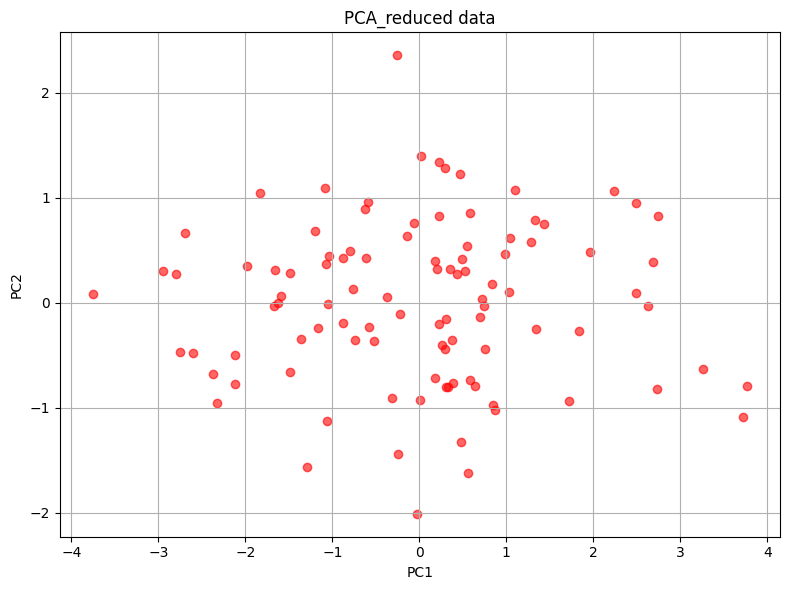

In [14]:
model = PCA(X , k = 2)

plt.figure(figsize=(8,6))
plt.scatter(model[:,0], model[:,1], c='red', alpha =0.6)
plt.title("PCA_reduced data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()